In [1]:
# Setting up dependencies to be utilized later here.

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import calendar
from datetime import datetime

In [2]:
# Converting .csv file into a dataframe for data manipulation
wa_lottery_path_2020 = Path("Resources/2020_lottery_data.csv")
wa_lottery_df_2020 = pd.read_csv(wa_lottery_path_2020)

# displaying .csv just to see what data we have
wa_lottery_df_2020

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,1/1/2020,Wed,49-53-57-59-62,26,2,220000000
1,1/4/2020,Sat,1-11-21-25-54,7,2,237000000
2,1/8/2020,Wed,2-4-7-43-56,22,4,258000000
3,1/11/2020,Sat,3-21-23-31-59,3,2,277000000
4,1/15/2020,Wed,39-41-53-55-68,19,2,296000000
...,...,...,...,...,...,...
100,12/16/2020,Wed,4-23-37-61-67,7,2,287000000
101,12/19/2020,Sat,27-32-34-43-52,13,2,304000000
102,12/23/2020,Wed,6-13-38-39-53,6,3,321000000
103,12/26/2020,Sat,10-24-27-35-53,18,2,341000000


In [3]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerball'
weekday_powerball_2020 = wa_lottery_df_2020[['weekday','powerball']]

# groupby weekday (sets index to weekday), for the column 'powerball' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
# lambda is a keyword that is built into python to create a anonymous function
# lambda : An anonymous inline function consisting of a single expression which is evaluated when the function is called. 
# The syntax to create a lambda function is lambda [parameters]: expression.  This is from the official python documentation
powerball_grouped_2020 = weekday_powerball_2020.groupby('weekday')['powerball'].apply(lambda x: x.mode())

In [4]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerplay'
weekday_powerplay_2020 = wa_lottery_df_2020[['weekday', 'powerplay']]

# groupby weekday (sets index to weekday), for the column 'powerplay' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
powerplay_grouped_2020 = weekday_powerplay_2020.groupby('weekday')['powerplay'].apply(lambda x: x.mode())

In [5]:
# Combine powerplay/powerball common 2020 DataFrames
combined_common_weekday_2020 = pd.merge(powerball_grouped_2020, powerplay_grouped_2020, on ='weekday')

# Display the data types of the columns in the DataFrame


# Question 1 Answer
combined_common_weekday_2020

,powerball,powerplay
weekday,,
Sat,18,2
Wed,2,2


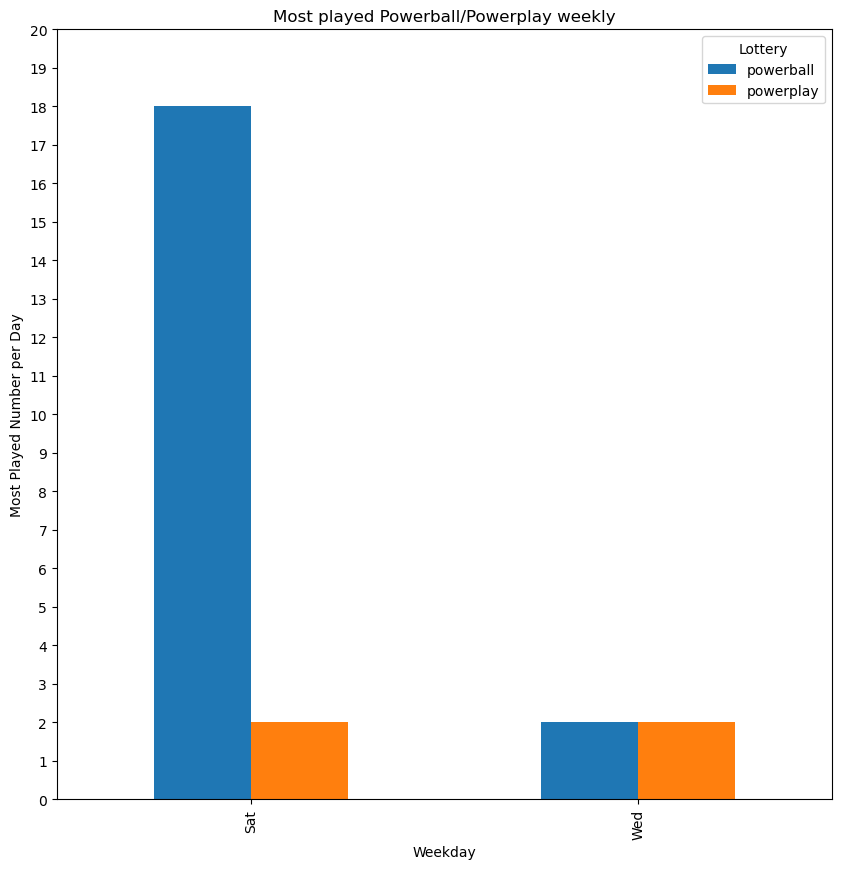

<Figure size 640x480 with 0 Axes>

In [6]:
# Create a bar chart based off of the group series from before
ax = combined_common_weekday_2020.plot(kind='bar', figsize=(10,10))

# set the y-axis so it looks better
ax.set_ylim(0, 19)
ax.set_yticks(range(0, 21, 1))

# Label the axis and title the graph
ax.set_xlabel("Weekday")
ax.set_ylabel("Most Played Number per Day")
ax.set_title('Most played Powerball/Powerplay weekly')
ax.legend(title = 'Lottery', loc = 'upper right')

plt.show()
plt.tight_layout()



In [7]:
# create a copy of the original dataframe with columns 'date' and 'powerball'
# This will eliminate any warnings about the original dataframes index
date_powerball_2020 = wa_lottery_df_2020[['date', 'powerball']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerball_2020['date'] = pd.to_datetime(date_powerball_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerball_2020['month'] = date_powerball_2020['date'].dt.month

# make a variable that holds a dataframe that is grouped by month
month = date_powerball_2020.groupby('month')

# create an empty dictionary
powerball_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1,13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    # Getting rows

    # take the variable month_data the mode and store to list
    powerball_common_2020[i] = month_data['powerball'].mode().to_list()

# Convert my dictionary to a series so I can use the .apply() function and lambda to it.
powerball_common_series_2020 = (pd.Series(powerball_common_2020))

# use the .apply() function with the lambda function to perform a loop through all the series and store the modes that don't have mode = 1.
cleaned_powerball_common_2020 = powerball_common_series_2020.apply(lambda x: x if len(x) != 9 else 0)

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerball_common_months_2020 = cleaned_powerball_common_2020.to_frame(name='Common Powerballs')  

In [8]:
# create a copy of the original dataframe with columns 'date' and 'powerplay'
# This will eliminate any warnings about the original dataframes index
date_powerplay_2020 = wa_lottery_df_2020[['date', 'powerplay']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerplay_2020['date'] = pd.to_datetime(date_powerplay_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerplay_2020['month'] = date_powerplay_2020['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball_2020
month = date_powerplay_2020.groupby('month')

# create an empty dictionary
powerplay_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    powerplay_common_2020[i] = month_data['powerplay'].mode().to_list()
    
# Convert my dictionary to a series so I can use the .apply() function and lambda to it.
powerplay_common_series_2020 = pd.Series(powerplay_common_2020)

# use the .apply() function with the lambda function to perform a loop through all the series and store the modes that don't have mode = 1.
cleaned_powerplay_common_2020 = powerplay_common_series_2020.apply(lambda x: x if len(x) != 9 else 0)

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerplay_common_months_2020 = cleaned_powerplay_common_2020.to_frame(name='Common Powerplays')  

In [9]:
# combine the two dataframes that hold the months together
combined_common_months_2020 = pd.merge(powerplay_common_months_2020, powerball_common_months_2020, left_index=True, right_index=True)

# Use calendar library for abbreviations and order
month = dict((enumerate(calendar.month_name)))

# rename function for index change
combined_common_months_2020 = combined_common_months_2020.rename(index=month)

# Question 2 Answer

print(f"One of the most common powerball numbers for the year 2020 was August {combined_common_months_2020.loc['August','Common Powerballs']}")
print(f"One of the most common powerball numbers for the year 2020 was August {combined_common_months_2020.loc['August','Common Powerplays']}")

One of the most common powerball numbers for the year 2020 was August [24]
One of the most common powerball numbers for the year 2020 was August [3]


In [10]:
combined_common_months_2020

,Common Powerplays,Common Powerballs
January,[2],[18]
February,[3],[13]
March,[2],[8]
April,"[2, 3]",0
May,[2],[20]
June,[3],"[5, 18]"
July,[2],"[4, 18]"
August,[3],[24]
September,[2],"[1, 18]"
October,[2],0


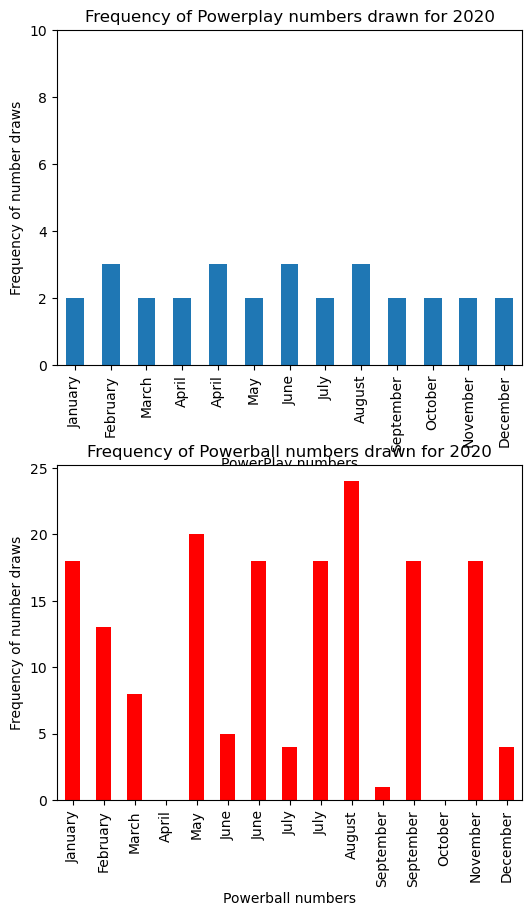

In [11]:
# Convert the lists of numbers in the 'Common Powerplays' column into a single list of numbers
powerplay_nums = combined_common_months_2020['Common Powerplays'].explode()
powerball_nums = combined_common_months_2020['Common Powerballs'].explode()

#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (6,10))

#add DataFrames to subplots
powerplay_nums.plot(kind='bar', xlabel = 'PowerPlay numbers', ylabel = 'Frequency of number draws', 
                      title = 'Frequency of Powerplay numbers drawn for 2020', ax=axes[0])
powerball_nums.plot(kind='bar', xlabel = 'Powerball numbers', ylabel = 'Frequency of number draws', 
                      title = 'Frequency of Powerball numbers drawn for 2020', color = 'r', ax=axes[1])

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.3)

# Set the y-axis limit for the first subplot
axes[0].set_ylim([0, 10])

plt.show()

In [12]:
# generate a new dataframe to hold year data for weekday, powerplay, powerball
year_tot_common_2020 = wa_lottery_df_2020.copy()
powerlist = ['powerball', 'powerplay']
# use the same function as before to find the maxiumum value that is repeated over the entire year for powerplay and powerball
year_common_powernums_2020 = year_tot_common_2020.groupby('weekday')[powerlist].apply(lambda x: x.mode().max())

#Answer to Question 3

print(f"There was only one common PowerBall number for Saturday {year_common_powernums_2020.loc['Sat', 'powerball']}, and Wednesday {year_common_powernums_2020.loc['Wed', 'powerball']}")
print(f"There was only one common PowerBall number for Saturday {year_common_powernums_2020.loc['Sat', 'powerplay']}, and Wednesday {year_common_powernums_2020.loc['Wed', 'powerplay']}")

There was only one common PowerBall number for Saturday 18, and Wednesday 2
There was only one common PowerBall number for Saturday 2, and Wednesday 2


In [13]:
# make a copy of the original DataFrame to manipulate
month_lottery_df_2020 = wa_lottery_df_2020.copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
month_lottery_df_2020['date'] = pd.to_datetime(month_lottery_df_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
month_lottery_df_2020['month'] = month_lottery_df_2020['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball_2020
month = month_lottery_df_2020.groupby('month')

# create an empty dictionary
jackpot_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest
    jackpot_common_2020[i] = month_data['jackpot'].mode().max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
jackpot_common_months_2020 = pd.DataFrame.from_dict(jackpot_common_2020, orient='index', columns=['Common Jackpot'])

# https://stackoverflow.com/questions/61842649/renaming-months-from-number-to-name-in-pandas
# Utilizing pythons calendar function, converted the index to the abbreviated months
# Use calendar library for month name
month = dict((enumerate(calendar.month_name)))

# add month to dataframe
jackpot_common_months_2020['Months'] = month


# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_months_jackpot = jackpot_common_months_2020.sort_values(by=['Common Jackpot'], ascending = False)


# ANSWER QUESTION 4

print(top_months_jackpot.head(5))

    Common Jackpot    Months
1        394000000   January
12       363000000  December
11       216000000  November
4        190000000     April
8        169000000    August


In [14]:
# Generated a new dataframe that holds only the three columns 'date' + 'weekday' + 'jackpot'
weekday_jackpot_2020 = wa_lottery_df_2020[['date', 'weekday', 'jackpot']]

# Group project dataframe
weekday_max_jackpot_2020 = wa_lottery_df_2020[['date', 'weekday', 'jackpot']]

# Set up a new dataframe that will be used for the 2020-2022 graphs
weekday_max_jackpot_2020 = weekday_max_jackpot_2020.groupby('weekday')['jackpot'].apply(lambda x: x.max())

# find the highest jackpot
greatest_jackpot_2020 = weekday_jackpot_2020.loc[weekday_jackpot_2020['jackpot'].idxmax()]


#ANSWER QUESTION 5 

print(f"{greatest_jackpot_2020.date} had the greatest jackpot for 2020 with {greatest_jackpot_2020.jackpot} dollars.")

1/29/2020 had the greatest jackpot for 2020 with 394000000 dollars.


C:\Users\eeels\AppData\Local\Temp\ipykernel_15820\2513329071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_jackpot_2020['date'] = pd.to_datetime(weekday_jackpot_2020['date'])


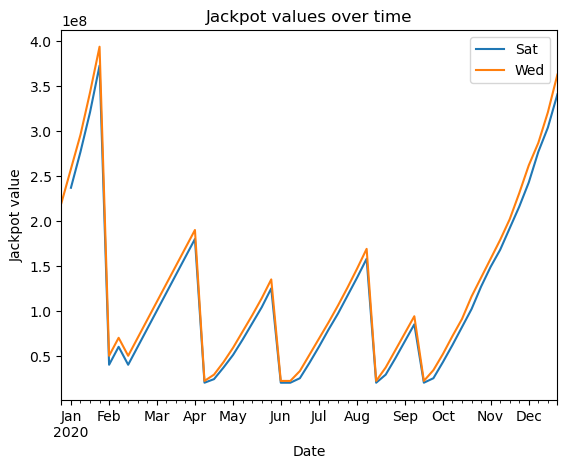

In [15]:
weekday_jackpot_2020['date'] = pd.to_datetime(weekday_jackpot_2020['date'])

fig, ax = plt.subplots()

for day, group in weekday_jackpot_2020.groupby('weekday'):
    group.plot(x='date', y='jackpot', ax = ax, label = day)

# Set the title and axis labels
ax.set_title('Jackpot values over time')
ax.set_xlabel('Date')
ax.set_ylabel('Jackpot value')

plt.show()

In [16]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [17]:
# +++++++++++++++++++++++++++++++++++++++++++2021 DATA BEGINS BELOW THIS!+++++++++++++++++++++++++++++++++++++++++++++++++
# ++++++++++++++++++++++++++++++++++++++++++++++++++++\(*ˊᗜˋ*)/ ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [18]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [19]:
# 2021 Lottery data file
wa_lottery_to_load = Path("Resources/2021_lottery_data.csv")

# Read the lottery data file and convert into a single DataFrame
wa_lottery_df = pd.read_csv(wa_lottery_to_load)

# Display the data table for preview
wa_lottery_df.head(10)

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,1/2/2021,Sat,3-4-11-41-67,5,2,384000000
1,1/6/2021,Wed,1-20-22-60-66,3,3,410000000
2,1/9/2021,Sat,14-26-38-45-46,13,2,470000000
3,1/13/2021,Wed,4-19-23-25-49,14,2,550000000
4,1/16/2021,Sat,14-20-39-65-67,2,3,640000000
5,1/20/2021,Wed,40-53-60-68-69,22,3,730000000
6,1/23/2021,Sat,5-8-17-27-28,14,3,20000000
7,1/27/2021,Wed,17-33-35-42-52,9,3,20000000
8,1/30/2021,Sat,1-2-7-52-61,4,3,30000000
9,2/3/2021,Wed,5-37-40-64-66,5,3,20000000


In [20]:
# Create bar plot showing the most played powerball/powerplay number for each weekday using Pandas.
# Need to use .groupby plus .value_counts to get the number of powerball/powerplay plays for each weekday
weekday_powerball_total = wa_lottery_df.groupby(["weekday"])["powerball"].apply(lambda x: x.mode())
weekday_powerplay_total = wa_lottery_df.groupby(["weekday"])["powerplay"].apply(lambda x: x.mode())


# Take .max to find most played powerball/powerplay number 
max_powerball = weekday_powerball_total.groupby(["weekday"]).idxmax().values
max_powerplay = weekday_powerplay_total.groupby(["weekday"]).idxmax().values


# Assemble the resulting index into a single summary DataFrame.
weekday_combined_df = pd.DataFrame({"Powerball Weekday Max": max_powerball,
                                   "Powerplay Weekday Max": max_powerplay})

#Split both dataframes from ( , ) to two new columns
weekday_powerball_split_df = pd.DataFrame(weekday_combined_df["Powerball Weekday Max"].tolist(), columns = ["Weekday","Powerball Most Played Number"])
weekday_powerplay_split_df = pd.DataFrame(weekday_combined_df["Powerplay Weekday Max"].tolist(), columns = ["Weekday","Powerplay Most Played Number"])

# Merge both dataframes together 
most_played_per_day_df = weekday_powerball_split_df.merge(weekday_powerplay_split_df, how = "left")

#Convert Powerball Most Played Number and 	Powerpplay Most Played Number to int for ploting
most_played_per_day_df["Powerball Most Played Number"] = most_played_per_day_df["Powerball Most Played Number"].astype(int)
most_played_per_day_df["Powerplay Most Played Number"] = most_played_per_day_df["Powerplay Most Played Number"].astype(int)


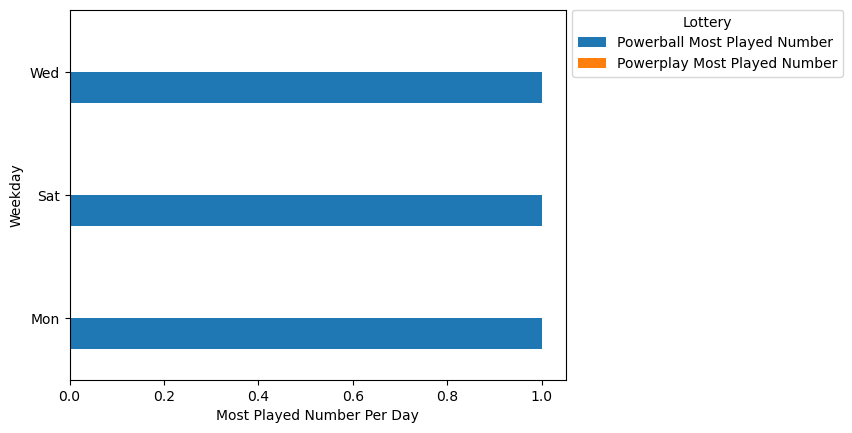

In [21]:
# Plot bar chart
data = most_played_per_day_df.plot(x="Weekday", y=["Powerball Most Played Number", "Powerplay Most Played Number"], kind = "barh")
data.set(xlabel = 'Most Played Number Per Day')
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')


In [22]:
# Create bar plot showing the most played powerball/powerplay number for each month using Pandas.
# Take a copy of the orginal dataframe "date", "powerball", "powerplay", "jackpot" values
lottery_date_df = wa_lottery_df[["date", "powerball", "powerplay", "jackpot"]].copy()

# convert the date column from(mm/dd/yyyy) to (yyyy-mm-dd)
lottery_date_df["date"] = pd.to_datetime(lottery_date_df["date"])

# Create a new column called month that determines the month based on date 
# https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-and-pandas
lottery_date_df["month"] = lottery_date_df["date"].apply(lambda x:x.strftime("%B"))

# Need to use .groupby plus .value_counts to get the number of powerball/powerplay plays for each month
powerball_by_month = lottery_date_df.groupby(["month"])["powerball"].value_counts()
powerplay_by_month = lottery_date_df.groupby(["month"])["powerplay"].value_counts()

# Take .max to find most played powerball/powerplay number for each month
max_month_powerball = powerball_by_month.groupby(["month"]).idxmax().values
max_month_powerplay = powerplay_by_month.groupby(["month"]).idxmax().values

# Assemble the resulting series into a single summary DataFrame
combined_df = pd.DataFrame({"Powerball Month Max": max_month_powerball, 
                            "Powerplay Month Max": max_month_powerplay})

# Split dataframes into two dataframe then convet data from ( , ) to two new columns
powerball_split_df = pd.DataFrame(combined_df["Powerball Month Max"].tolist(), columns = ["Months","Powerball Most Played Number"])
powerplay_split_df = pd.DataFrame(combined_df["Powerplay Month Max"].tolist(), columns = ["Months","Powerplay Most Played Number"])

# Data has already been converted to int
# Merge both dataframes together 
most_played_per_month_df = powerball_split_df.merge(powerplay_split_df, how = "left")

# Categorize Dataframe by Month ("Jan", "Feb"...."Dec")
# https://stackoverflow.com/questions/67472895/creating-using-categorical-data-type-with-pandas
most_played_per_month_df["Months"] = pd.Categorical(most_played_per_month_df["Months"], categories = ["January", "February", "March", "April", "May", "June", 
                                                                                                        "July", "August", "September", 
                                                                                                        "October", "November", "December"], ordered = True)
# Sort DataFrame by months and reset index                                                    
most_played_per_month_df = most_played_per_month_df.sort_values(["Months"]).reset_index(drop = True)

# Display the data table for preview
most_played_per_month_df 

,Months,Powerball Most Played Number,Powerplay Most Played Number
0,January,14,3
1,February,1,3
2,March,18,2
3,April,3,2
4,May,8,2
5,June,1,3
6,July,3,2
7,August,26,2
8,September,21,2
9,October,1,2


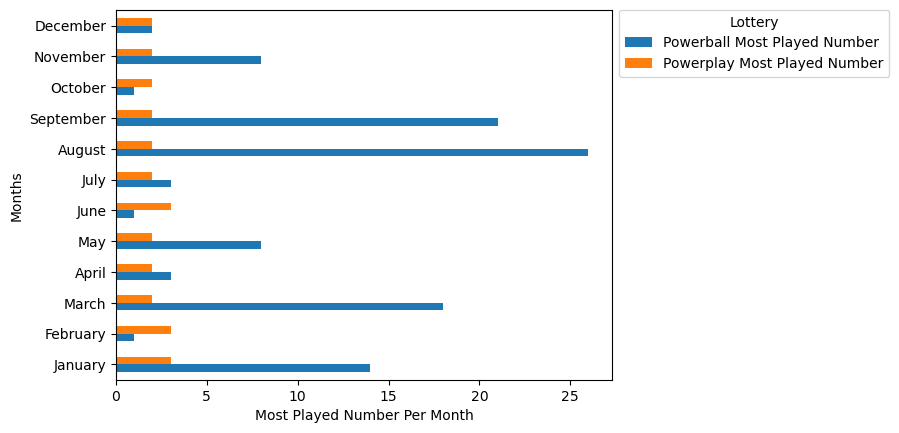

In [23]:
# Plot bar chart
data2 = most_played_per_month_df.plot(x="Months", y=["Powerball Most Played Number", "Powerplay Most Played Number"], kind = "barh")
data2.set(xlabel = 'Most Played Number Per Month')
data2.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')


In [24]:
# Create bar plot showing the most played powerball/powerplay number overall.
# Need to use .value_counts to get the number of powerball/powerplay plays for entire data set
# Take .max to find most played powerball/powerplay number 
powerball_total = wa_lottery_df["powerball"].value_counts().idxmax()
powerplay_total = wa_lottery_df["powerplay"].value_counts().idxmax()

#Print results
print(f'Most played powerball number : {powerball_total}')
print(f'Most played powerplay number : {powerplay_total}')

Most played powerball number : 24
Most played powerplay number : 2


In [25]:
# Find the top 3 months with highest jackpot
# Take a copy of lottery_date_df dataframe "date" and "jackpot" values
jackpot_df = lottery_date_df[["date", "jackpot"]].copy()

# Create a new column called month that determines the month based on date 
# https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-and-pandas
jackpot_df["month"] = jackpot_df["date"].apply(lambda x:x.strftime("%B"))

# Need to use .groupby plus .value_counts to get the number of powerball/powerplay plays for each month
jackpot_by_month = lottery_date_df.groupby(["month"])["jackpot"].value_counts()

# Take .max to find most played powerball/powerplay number for each month
max_jackpot_powerball = jackpot_by_month.groupby(["month"]).idxmax().values

# Assemble the resulting series into a single summary DataFrame
combined_jackpot_df = pd.DataFrame({"Data": max_jackpot_powerball})

# Split dataframes into two dataframe then convet data from ( , ) to two new columns
jackpot_split_df = pd.DataFrame(combined_jackpot_df["Data"].tolist(), columns = ["Months","Highest Jackpot Per Month"])

# Convert Powerball Most Played Number and 	Powerpplay Most Played Number to int for ploting
jackpot_split_df["Highest Jackpot Per Month"] = jackpot_split_df["Highest Jackpot Per Month"].astype(int)

# Categorize Dataframe by Month ("Jan", "Feb"...."Dec")
# https://stackoverflow.com/questions/67472895/creating-using-categorical-data-type-with-pandas
jackpot_split_df["Months"] = pd.Categorical(jackpot_split_df["Months"], categories = ["January", "February", "March", "April", "May", "June", 
                                                                                                        "July", "August", "September", 
                                                                                                        "October", "November", "December"], ordered = True)
# Sort DataFrame by months and reset index 
jackpot_df = jackpot_split_df.sort_values(["Months"]).reset_index(drop = True)

# Sort the schools by `Highest Jackpot Per Month' in ascending order and display the top 5 rows.
top_5_jackpot = jackpot_df.sort_values(by = "Highest Jackpot Per Month", ascending=False)

# Display the data table for preview
top_5_jackpot.head(5).reset_index(drop = True)

,Months,Highest Jackpot Per Month
0,September,345000000
1,December,264000000
2,August,211000000
3,May,129000000
4,November,123000000


In [26]:
# Take a copy of the orginal dataframe "weekday" amd "jackpot" values
jackpot_weekday_df = wa_lottery_df[["weekday", "jackpot"]]

# Need to use .groupby plus .value_counts to get the jackpot for each weekday
jackpot_weekday_total = jackpot_weekday_df.groupby(["weekday"])["jackpot"].value_counts()

# Take .max to find most played powerball/powerplay number 
max_jackpot_weekday = jackpot_weekday_total.groupby(["weekday"]).idxmax().values

# Assemble the resulting index into a single summary DataFrame.
jackpot_weekday_combined_df = pd.DataFrame({"Jackpot Weekday Max": max_jackpot_weekday})

#Split both dataframes from ( , ) to two new columns
weekday_jackpot_max_df = pd.DataFrame(jackpot_weekday_combined_df["Jackpot Weekday Max"].tolist(), columns = ["Weekday","Jackpot Weekday Max Value"])

# Display the data table for preview
weekday_jackpot_max_df 

,Weekday,Jackpot Weekday Max Value
0,Mon,416000000
1,Sat,30000000
2,Wed,20000000


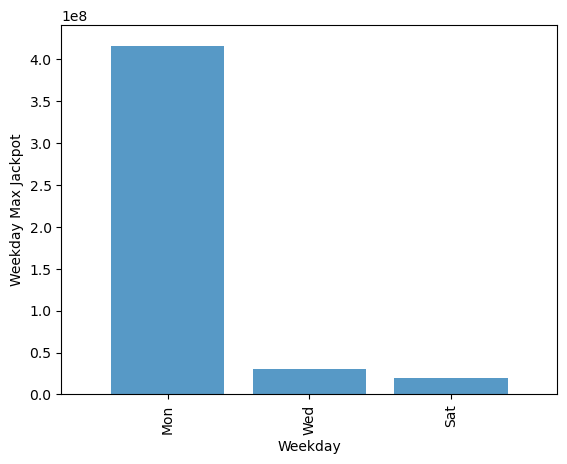

<Figure size 640x480 with 0 Axes>

In [27]:
# Plot bar chart
Weekday = ["Mon", "Wed", "Sat"]
Jackpot  = [416000000, 30000000, 20000000]
x_axis = np.arange(0, len(Jackpot))
tick_locations = [x for x in x_axis]

# Use #1f77b4 for default blue to match bar chart above
plt.bar(x_axis, Jackpot, color="#1f77b4", alpha=0.75, align="center")

# Set the xlimit and ylimit 
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Jackpot) + 25000000)

# Set the xlabel and ylabel 
plt.xlabel("Weekday")
plt.ylabel("Weekday Max Jackpot")

# Set tick location
plt.xticks(tick_locations, Weekday, rotation = 90)

plt.show()
plt.tight_layout()

In [28]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [29]:
# +++++++++++++++++++++++++++++++++++++++++++2022 DATA BEGINS BELOW THIS!+++++++++++++++++++++++++++++++++++++++++++++++++
# +++++++++++++++++++++++++++++++++++++++++++++++++++++\(*ˊᗜˋ*)/ +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [31]:
file = Path('Resources/2022_lottery_data.csv')

df_2022 = pd.read_csv(file)
df_2022['month'] = pd.to_datetime(df_2022['date']).dt.month
df_2022

,date,weekday,winning_numbers,powerball,powerplay,jackpot,month
0,1/1/2022,Sat,6-12-39-48-50,7,2,5.000000e+08,1
1,1/3/2022,Mon,2-13-32-33-48,22,2,5.400000e+08,1
2,1/5/2022,Wed,6-14-25-33-46,17,2,6.300000e+08,1
3,1/8/2022,Sat,20-21-36-60-65,13,10,2.000000e+07,1
4,1/10/2022,Mon,14-17-18-21-27,9,2,2.700000e+07,1
...,...,...,...,...,...,...,...
127,10/24/2022,Mon,18-23-35-45-54,16,4,6.250000e+08,10
128,10/26/2022,Wed,19-36-37-46-56,24,2,7.000000e+08,10
129,10/29/2022,Sat,19-31-40-46-57,23,3,8.250000e+08,10
130,10/31/2022,Mon,13-19-36-39-59,13,3,1.000000e+09,10


In [32]:
#year mode for powerball and powerplay.  Question 1
pb_counts2022 = df_2022[['powerball', 'powerplay', 'month']]

monthly_powerball_nums= pb_counts2022.groupby('month')['powerball'].apply(lambda x: x.mode())
monthly_powerplay_nums = pb_counts2022.groupby('month')['powerplay'].apply(lambda x: x.mode())

modes_year_2022 = pd.merge(monthly_powerball_nums, monthly_powerplay_nums, on = 'month')



modes_year_2022

,powerball,powerplay
month,,
1,13,2
1,16,2
1,17,2
1,22,2
2,19,2
3,6,2
4,18,2
5,17,2
6,4,2


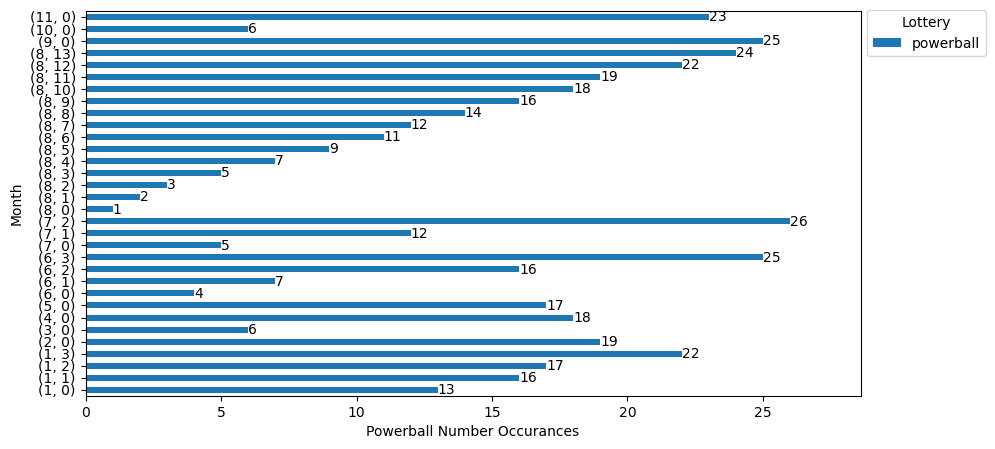

In [33]:
#month modes.  Question 2
pb_month_2022 = df_2022[['month','powerball']]
pp_month_2022 = df_2022[['month','powerplay']]

pb_month_counts2022 = pb_month_2022.groupby('month')['powerball'].apply(lambda x: x.mode())
pp_month_counts2022 = pp_month_2022.groupby('month')['powerplay'].apply(lambda x: x.mode())

modes_month_2022 = pd.merge(pb_month_counts2022, pp_month_counts2022,left_index=True, right_index=True)

data = pb_month_counts2022.plot(kind = 'barh', ylabel = 'Month', figsize = (10,5))
data.set(xlabel = 'Powerball Number Occurances')
for c in data.containers:
    data.bar_label(c, fmt = '%.0f', label_type = 'edge')
data.margins(x = 0.1)
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')


In [34]:
#day modes.  Question 3
pb_day_2022 = df_2022[['weekday','powerball']]
pp_day_2022 = df_2022[['weekday','powerplay']]

pb_day_counts2022 = pb_day_2022.groupby('weekday')['powerball'].apply(lambda x: x.mode())
pp_day_counts2022 = pp_day_2022.groupby('weekday')['powerplay'].apply(lambda x: x.mode())

modes_day_2022 = pd.merge(pb_day_counts2022, pp_day_counts2022,left_index=True, right_index=True)

print(pb_day_counts2022)

weekday   
Mon      0    16
Sat      0     7
         1    11
         2    13
         3    18
         4    26
Wed      0    17
         1    24
Name: powerball, dtype: int64


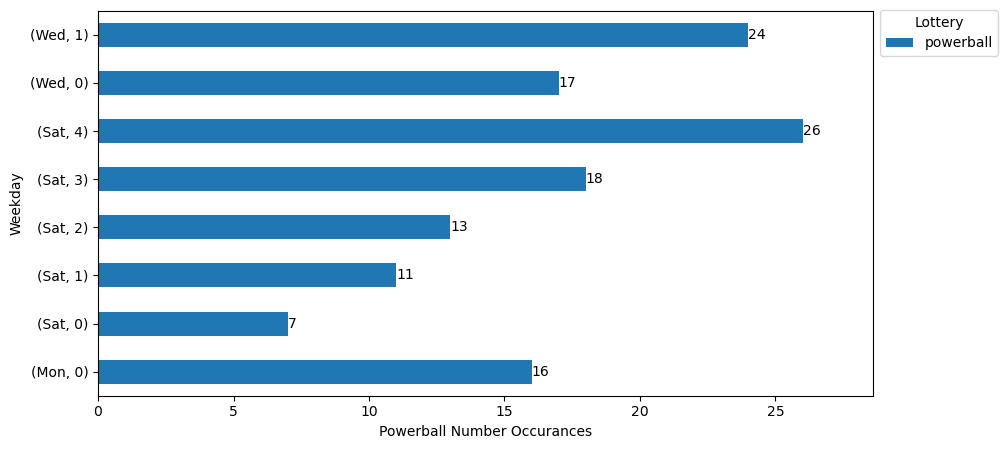

In [35]:

data = pb_day_counts2022.plot(kind = 'barh', ylabel = 'Weekday', figsize = (10,5))
data.set(xlabel = 'Powerball Number Occurances')
for c in data.containers:
    data.bar_label(c, fmt = '%.0f', label_type = 'edge')
data.margins(x = 0.1)
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')


In [36]:
#highest dollar months, top 5.  Question 4
months_2022df = df_2022[['month','jackpot']]

months_sums2022 = months_2022df.groupby('month')['jackpot'].apply(lambda x: x.max())
months_list2022 = months_sums2022.sort_values(ascending = False)

months_list2022.head(5)


month
11    1.200000e+11
10    1.000000e+09
1     6.300000e+08
4     4.540000e+08
6     3.650000e+08
Name: jackpot, dtype: float64

In [37]:
#highest dollar day.  Question 5
days_2022df = df_2022[['weekday','jackpot']]

days_sums2022 = days_2022df.groupby('weekday')['jackpot'].apply(lambda x: x.max())
days_list2022 = days_sums2022.sort_values(ascending = False)

print(days_list2022.idxmax(), days_list2022.max())


Wed 120000000000.0


In [38]:
# ++++++++++++++++++++++++++++++++++++++++++++++QUESTIONS WITH COMBINED YEARS++++++++++++++++++++++++++++++++++++++++++++++++
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [39]:
# Modify 2020 so it fits better with our other years
jackpot_common_months_2020.rename(columns = {'Common Jackpot' : 'Jackpot Max'}, inplace = True)

# Modify 2021 so it fits better with our other years
jackpot_df.rename(columns = {'Highest Jackpot Per Month' : 'Jackpot Max'}, inplace = True)
jackpot_df.index += 1

# Modify 2022 dataframe so it fits easier with our other data
# months_sums2022.index += 1
months_sums2022 = months_sums2022.reset_index()


# Rename the columns
months_sums2022.columns = ['Months', 'Jackpot Max']

# making a new row to reflect that december is missing
new_row_2022 = {'Months': 12, 'Jackpot Max': 0}
months_sums2022 = months_sums2022.append(new_row_2022, ignore_index=True)

# replace the months numbers with actual month names
month = dict((enumerate(calendar.month_name, start=-1)))

months_sums2022['Months'] = month

months_sums2022.index = range(1, len(months_sums2022) + 1)

print(jackpot_common_months_2020, jackpot_df, months_sums2022)

    Jackpot Max     Months
1     394000000    January
2      70000000   February
3     160000000      March
4     190000000      April
5     125000000        May
6      22000000       June
7     126000000       July
8     169000000     August
9      94000000  September
10    127000000    October
11    216000000   November
12    363000000   December        Months  Jackpot Max
1     January     20000000
2    February     20000000
3       March     20000000
4       April     32000000
5         May    129000000
6        June     20000000
7        July    101000000
8      August    211000000
9   September    345000000
10    October     20000000
11   November    123000000
12   December    264000000        Months   Jackpot Max
1     January  6.300000e+08
2    February  1.830000e+08
3       March  2.060000e+08
4       April  4.540000e+08
5         May  1.570000e+08
6        June  3.650000e+08
7        July  1.700000e+08
8      August  2.020000e+08
9   September  3.000000e+08
10    October  1.0

C:\Users\eeels\AppData\Local\Temp\ipykernel_15820\3846826393.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  months_sums2022 = months_sums2022.append(new_row_2022, ignore_index=True)


Text(0.5, 0.98, '2020 - 2022 Max Jackpot per Month')

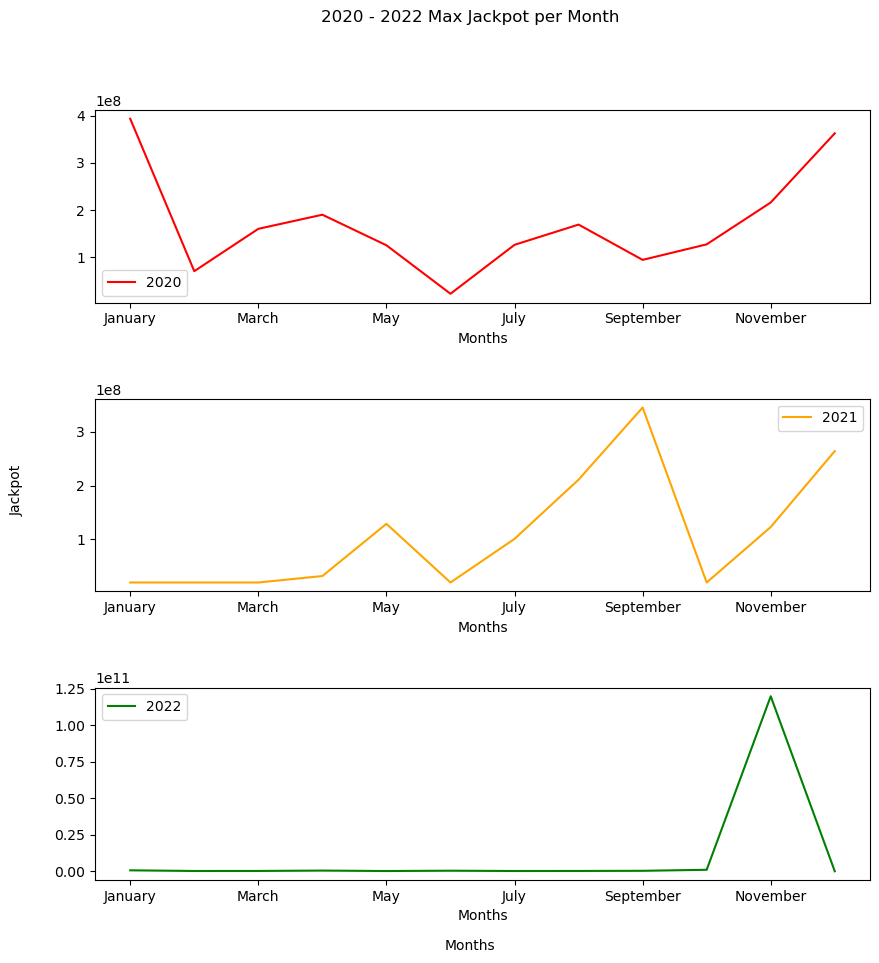

In [40]:
#define subplot layout
fig, axes = plt.subplots(nrows=3, ncols=1, figsize= (10, 10))
fig.subplots_adjust(hspace=0.5)

#add DataFrames to subplots
ax1 = jackpot_common_months_2020.plot(x = 'Months', color = 'red', ax=axes[0])
ax2 = jackpot_df.plot(x = 'Months', color = 'orange', ax=axes[1])
ax3 = months_sums2022.plot(x = 'Months', color = 'green', ax=axes[2])

#set legend labels
ax1.legend(['2020'])
ax2.legend(['2021'])
ax3.legend(['2022'])

#set x and y labels for the entire figure
fig.text(0.5, 0.04, 'Months', ha='center')
fig.text(0.04, 0.5, 'Jackpot', va='center', rotation='vertical')

#set title
fig.suptitle('2020 - 2022 Max Jackpot per Month')

In [41]:


Wed 120000000000.0

SyntaxError: invalid syntax (2925693772.py, line 1)